<img src="http://xarray.pydata.org/en/stable/_static/dataset-diagram-logo.png" align="center" width="30%">

## Intro to Xarray

## Outline

1. Introduction to Xarray
1. Anatomy of a DataArray 

## Imports

In [2]:
import xarray as xr

### While Pandas is great for many purposes, extending its inherently 2-d data representation to a multidimensional dataset, such as 4-dimensional (time, vertical level, longitude (x) and latitude (y)) gridded NWP/Climate model output, is unwise. 

***
### Gridded data is typically written in a non-ASCII (i.e., not human-readable) format. The two most widely-used formats are [GRIB](https://en.wikipedia.org/wiki/GRIB) and [NetCDF](https://www.unidata.ucar.edu/software/netcdf/). These binary formats take up less storage space than text.

## Introduction to Xarray

### The Xarray package is ideally-suited for gridded data, in particular NetCDF. It builds and extends on the multi-dimensional data structure in NumPy. We will see that some of the same methods we've used for Pandas have analogues in Xarray.

***

#### As a a general introduction to Xarray, below is part of a section from the [Xarray Tutorial](https://github.com/xarray-contrib/xarray-tutorial/tree/master/scipy-tutorial) that was presented at the [SciPy 2020 conference](https://www.scipy2020.scipy.org/):
***
<span style="color:green">(Start of SciPy 2020 Xarray Tutorial snippet)</span>
<img src="http://xarray.pydata.org/en/stable/_static/dataset-diagram-logo.png" align="right" width="30%">

---

Multi-dimensional (a.k.a. N-dimensional, ND) arrays (sometimes called “tensors”)
are an essential part of computational science. They are encountered in a wide
range of fields, including physics, astronomy, geoscience, bioinformatics,
engineering, finance, and deep learning. In Python, [NumPy](https://numpy.org/)
provides the fundamental data structure and API for working with raw ND arrays.
However, real-world datasets are usually more than just raw numbers; they have
*labels* which encode information about how the array values map to locations in
space, time, etc.

Here is an example of how we might structure a dataset for a weather forecast:

<img src="http://xarray.pydata.org/en/stable/_images/dataset-diagram.png" align="center" width="80%">

You'll notice multiple *data variables* (temperature, precipitation), *coordinate
variables* (latitude, longitude), and *dimensions* (x, y, t). We'll cover how these
fit into Xarray's data structures below.

Xarray doesn’t just keep track of labels on arrays – it uses them to provide a
powerful and concise interface, with methods that look a lot like Pandas. For example:

- Apply operations over dimensions by name: `x.sum('time')`.

- Select values by label (or logical location) instead of integer location:
  `x.loc['2014-01-01']` or `x.sel(time='2014-01-01')`.

- Mathematical operations (e.g., `x - y`) vectorize across multiple dimensions
  (array broadcasting) based on dimension names, not shape.

- Easily use the split-apply-combine paradigm with groupby:
  `x.groupby('time.dayofyear').mean()`.

- Database-like alignment based on coordinate labels that smoothly handles
  missing values: `x, y = xr.align(x, y, join='outer')`.

- Keep track of arbitrary metadata in the form of a Python dictionary:
  `x.attrs`.

The N-dimensional nature of xarray’s data structures makes it suitable for
dealing with multi-dimensional scientific data, and its use of dimension names
instead of axis labels (`dim='time'` instead of `axis=0` or `axis='columns'`) makes such arrays much
more manageable than the raw numpy ndarray: with xarray, you don’t need to keep
track of the order of an array’s dimensions or insert dummy dimensions of size 1
to align arrays (e.g., using np.newaxis).

The immediate payoff of using xarray is that you’ll write less code. The
long-term payoff is that you’ll understand what you were thinking when you come
back to look at it weeks or months later.

<span style="color:green">(End of SciPy 2020 Xarray Tutorial snippet)</span>
***



### Core XArray objects: the **Dataset** and the **DataArray**

#### As did Pandas with its `Series` and `DataFrame` core data structures, Xarray also has two "workhorses": the `DataArray` and the `Dataset`. Just as a Pandas `DataFrame` consists of multiple `Series`, an Xarray `Dataset` is made up of one or more `DataArray` objects. Let's first look at a couple of `Dataset`s, that are Xarray's representation of two of our in-house archive of *Climate Forecast System Reanalysis* (**CFSR**) gridded data files.

In [3]:
# Similar to a Pandas DataFrame, we get a nice (and even more interactive) HTML representation of the object.
year = 2013
ds_slp = xr.open_dataset(f'/cfsr/data/{year}/pmsl.2013.0p5.anl.nc')
ds_g = xr.open_dataset(f'/cfsr/data/{year}/g.2013.0p5.anl.nc')    #.nc means its in netCDF format

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Tip:</p>
    We're leveraging what's called <a href="https://realpython.com/python-f-strings/">f-strings</a> to efficiently embed object values into a <code>print</code> statement.
</div>

In [4]:
ds_slp 

<xarray.Dataset>
Dimensions:  (time: 1460, lat: 361, lon: 720)
Coordinates:
  * time     (time) datetime64[ns] 1993-01-01 ... 1993-12-31T18:00:00
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float32 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
Data variables:
    pmsl     (time, lat, lon) float32 ...
Attributes:
    description:    pmsl as a single level variable
    year:           1993
    source:         http://nomads.ncdc.noaa.gov/data.php?name=access#CFSR-data
    references:     Saha, et. al., (2010)
    created_by:     User: kgriffin
    creation_date:  Wed Apr  4 05:59:11 UTC 2012

#### The `ds_slp` Dataset has the following properties:

1. It has three named *dimensions*, in order: time, lat(itude), and lon(gitude).
1. It has three *coordinate variables*, which (in this case, but not always) correspond to the *dimensions*.
1. It contains one named *data variable*: 'pmsl'. The data variable can be read in as a *Data Array*.
1. It has *attributes* which are the data variable's *metadata*.
1. Its coordinate variables may have their own metadata as well.

Next, examine the `ds_g` Dataset.

In [5]:
# Write your code here
ds_g

<xarray.Dataset>
Dimensions:  (time: 1460, lat: 361, lon: 720, lev: 32)
Coordinates:
  * time     (time) datetime64[ns] 1993-01-01 ... 1993-12-31T18:00:00
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float32 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
  * lev      (lev) float32 1e+03 975.0 950.0 925.0 900.0 ... 50.0 30.0 20.0 10.0
Data variables:
    g        (time, lev, lat, lon) float32 ...
Attributes:
    description:    g 1000-10 hPa
    year:           1993
    source:         http://nomads.ncdc.noaa.gov/data.php?name=access#CFSR-data
    references:     Saha, et. al., (2010)
    created_by:     User: kgriffin
    creation_date:  Wed Apr  4 05:58:31 UTC 2012

How do the properties for the `ds_g` Dataset compare and contrast to the `ds_slp` one?

## DataArrays

When we analyze and display information in a gridded Xarray `Dataset`, we are actually working with one or more `DataArray`s within one or more `Dataset`s. In the CFSR sea-level pressure dataset, there exists one gridded field, *pmsl*. Let's read it in as an Xarray `DataArray` object. You will see that we access it in a similar manner to how we accessed a column, aka `Series`, in a Pandas `Dataframe`.

In [6]:
slp = ds_slp['pmsl'] #selectthenameofthedataarray 

In [7]:
slp

<xarray.DataArray 'pmsl' (time: 1460, lat: 361, lon: 720)>
[379483200 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1993-01-01 ... 1993-12-31T18:00:00
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float32 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
Attributes:
    level_type:  single level variable
    units:       Pa
    long_name:   pressure reduced mean sea level

#### Similar to the `ds_slp` Dataset  which contains it, this `DataArray` has the following properties:

1. It is a named *data variable*: 'pmsl'
1. It has three named *dimensions*, in order: time, lat(itude), and lon(gitude).
1. It has three *coordinate variables*, which (in this case, but not always) correspond to the *dimensions*.
1. It has *attributes* which are the data variable's *metadata*.
1. Its coordinate variables may have their own metadata as well.

### Let's examine each of these five properties.

The *data variable*, *pmsl* in this case, is represented by the `DataArray` object itself. We can query various properties of it, with methods similar to Pandas.

In [8]:
# Akin to column and row indices in Pandas:
slp.indexes

Indexes:
time: DatetimeIndex(['1993-01-01 00:00:00', '1993-01-01 06:00:00',
                     '1993-01-01 12:00:00', '1993-01-01 18:00:00',
                     '1993-01-02 00:00:00', '1993-01-02 06:00:00',
                     '1993-01-02 12:00:00', '1993-01-02 18:00:00',
                     '1993-01-03 00:00:00', '1993-01-03 06:00:00',
                     ...
                     '1993-12-29 12:00:00', '1993-12-29 18:00:00',
                     '1993-12-30 00:00:00', '1993-12-30 06:00:00',
                     '1993-12-30 12:00:00', '1993-12-30 18:00:00',
                     '1993-12-31 00:00:00', '1993-12-31 06:00:00',
                     '1993-12-31 12:00:00', '1993-12-31 18:00:00'],
                    dtype='datetime64[ns]', name='time', length=1460, freq=None)
lat: Float64Index([-90.0, -89.5, -89.0, -88.5, -88.0, -87.5, -87.0, -86.5, -86.0,
                   -85.5,
                   ...
                    85.5,  86.0,  86.5,  87.0,  87.5,  88.0,  88.5,  89.0,  89.5,
 

In [9]:
slp.mean()

<xarray.DataArray 'pmsl' ()>
array(100982.1, dtype=float32)

In [10]:
slp.max()

<xarray.DataArray 'pmsl' ()>
array(106766.875)

In [11]:
slp.min()

<xarray.DataArray 'pmsl' ()>
array(91299.5)

### This invocation will return the lat, lon, and time of the minimum (or maximum) value in the DataArray (source: https://stackoverflow.com/questions/40179593/how-to-get-the-coordinates-of-the-maximum-in-xarray)

In [12]:
slp.where(slp==slp.min(), drop=True).coords

Coordinates:
  * time     (time) datetime64[ns] 1993-06-12T06:00:00
  * lat      (lat) float32 -63.0
  * lon      (lon) float32 2.5

We can use loc to select via dimension values, but note that order of indices must follow dimension order. 

In [13]:
slp.loc['1993-03-14-18:00:00',42.5,-74.0] 

<xarray.DataArray 'pmsl' ()>
array(99651.12, dtype=float32)
Coordinates:
    time     datetime64[ns] 1993-03-14T18:00:00
    lat      float32 42.5
    lon      float32 -74.0
Attributes:
    level_type:  single level variable
    units:       Pa
    long_name:   pressure reduced mean sea level

We can alternatively use Xarray's `sel` indexing technique, where we specify the names of the dimension and the values we are selecting ... can be in any order ... and does not need to include all dimensions. In the cell below, we get the SLP values for this particular point for every time in the dataset.

In [14]:
slp.sel(lon = -74.0, lat = 42.5)

<xarray.DataArray 'pmsl' (time: 1460)>
array([101087.47 , 101234.26 , 101707.9  , ..., 102255.695, 102277.64 ,
       102122.16 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1993-01-01 ... 1993-12-31T18:00:00
    lat      float32 42.5
    lon      float32 -74.0
Attributes:
    level_type:  single level variable
    units:       Pa
    long_name:   pressure reduced mean sea level

In [16]:
ts = slp.sel(lon = -74.0, lat = 42.5)

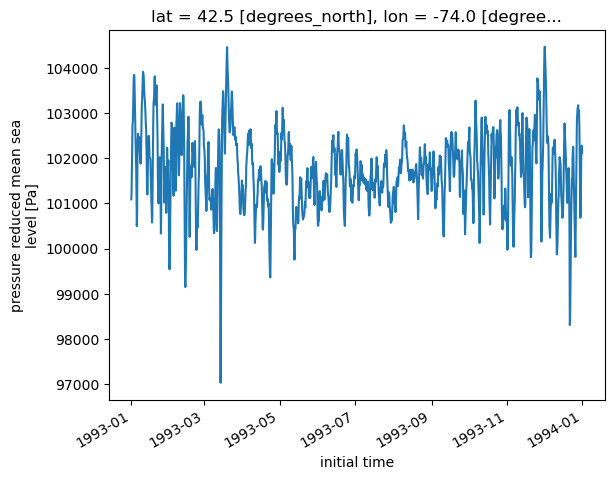

In [17]:
ts.plot()

### 2. Dimension names
In Xarray, dimensions can be thought of as extensions of Pandas` 2-d row/column indices (aka *axes*). We can assign names, or *labels*, to Pandas indexes; in Xarray, these *labeled axes* are a necessary (and excellent) feature.

In [18]:
slp.dims

('time', 'lat', 'lon')

### 3. Coordinates

### *Coordinate variables* in Xarray are 1-dimensional arrays that correspond to the *Data variable*'s dimensions.
In this case, `slp` has dimension coordinates of longitude, latitude, and time; each of these dimension coordinates consist of an array of values, plus metadata.

In [19]:
slp.coords

Coordinates:
  * time     (time) datetime64[ns] 1993-01-01 ... 1993-12-31T18:00:00
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float32 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5

### We can assign an object to each coordinate dimension.

In [20]:
lons = slp.lon

In [21]:
lats = slp.lat

In [22]:
time = slp.time

In [23]:
time

<xarray.DataArray 'time' (time: 1460)>
array(['1993-01-01T00:00:00.000000000', '1993-01-01T06:00:00.000000000',
       '1993-01-01T12:00:00.000000000', ..., '1993-12-31T06:00:00.000000000',
       '1993-12-31T12:00:00.000000000', '1993-12-31T18:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1993-01-01 ... 1993-12-31T18:00:00
Attributes:
    actual_range:  [1691808. 1700562.]
    last_time:     1993-12-31 18:00:00
    first_time:    1993-1-1 00:00:00
    delta_t:       0000-00-00 06:00:00
    long_name:     initial time

### 4. The data variables will typically have attributes (metadata) attached to them.

In [24]:
slp.attrs

{'level_type': 'single level variable',
 'units': 'Pa',
 'long_name': 'pressure reduced mean sea level'}

In [25]:
slp.units

'Pa'

### 5. The coordinate variables will likely have metadata as well.

In [26]:
time.attrs

{'actual_range': array([1691808., 1700562.]),
 'last_time': '1993-12-31 18:00:00',
 'first_time': '1993-1-1 00:00:00',
 'delta_t': '0000-00-00 06:00:00',
 'long_name': 'initial time'}

In [27]:
lats.attrs

{'actual_range': array([-90,  90], dtype=int32),
 'delta_y': 0.5,
 'coordinate_defines': 'center',
 'mapping': 'cylindrical_equidistant_projection_grid',
 'grid_resolution': '0.5_degrees',
 'long_name': 'latitude',
 'units': 'degrees_north'}

### Just as with Pandas, Xarray has a built-in hook to Matplotlib so we can take a quick look at our data.

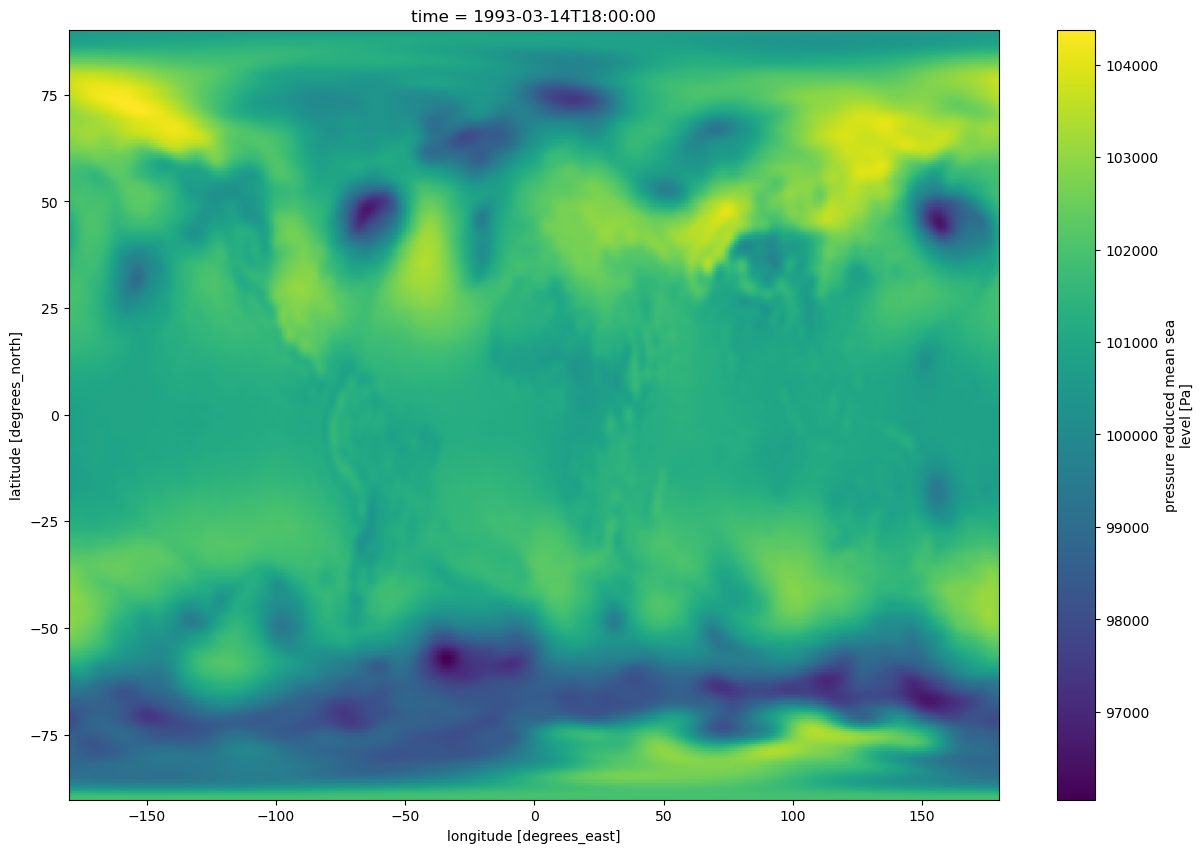

In [28]:
slp.sel(time='1993-03-14-18:00:00').plot(figsize=(15,10))